In [1]:
import numpy as np
import scipy as sp
from scipy import sparse as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

from src.phi import Phi
from src.definitions import Matrix, SparseMatrix
from src.helpers import get_FD_matrix, relative_error

In [2]:
# Set the desired theme
sns.set_theme(
    style='whitegrid',
    font_scale=1.2,
)

# Read/build the matrices

In [3]:
orani678 = sp.io.mmread('data/orani678.mtx').tocsc()
bcspwr10 = sp.io.mmread('data/bcspwr10.mtx').tocsc()
gr_30_30 = sps.csc_matrix(sp.io.mmread('data/gr_30_30.mtx').toarray().astype(np.float64))  # NOTE: Stored as int
helm2d03 = sp.io.mmread('data/helm2d03.mtx').tocsc()

In [4]:
# TODO: Load from SuiteSparse
fd_1d = get_FD_matrix(n=4096, d=1)
fd_2d = get_FD_matrix(n=64, d=2)
fd_3d = get_FD_matrix(n=16, d=3)

# Evaluating the implemented Arnoldi algorithms

- Orthogonality error: $\left\| V_m^*V_m - I \right\|_{2}$
- Projection error: $\left\| V_m^* A V_m - H_m \right\|_{max}$

In [5]:
def check_arnoldi(A, v, ms: list = None, title: str = None):

    if not ms:
        ms = [int(m) for m in np.linspace(1, 100, 51)]

    data = {
        'm': [],
        'orthogonality': [],
        'projection': [],
        're-orthogonalization': [],
    }
    for m in ms:
        V_m, H_m = Phi.arnoldi(A=A, v=v, m=m, ro=True)
        data['m'].append(m)
        data['orthogonality'].append(np.linalg.norm(V_m.conjugate().T @ V_m - np.eye(m, dtype=A.dtype)))
        data['projection'].append(np.linalg.norm(V_m.conjugate().T @ A @ V_m - H_m))
        data['re-orthogonalization'].append(True)
        V_m, H_m = Phi.arnoldi(A=A, v=v, m=m, ro=False)
        data['m'].append(m)
        data['orthogonality'].append(np.linalg.norm(V_m.conjugate().T @ V_m - np.eye(m, dtype=A.dtype)))
        data['projection'].append(np.linalg.norm(V_m.conjugate().T @ A @ V_m - H_m))
        data['re-orthogonalization'].append(False)

    # Plot the errors
    plt.figure()
    fig, axs = plt.subplots(2, figsize=(8,8))
    sns.lineplot(
        data=data,
        x='m',
        y='orthogonality',
        hue='re-orthogonalization',
        ax=axs[0],
    )
    axs[0].set(
        ylabel='Orthogonality error $\left\| V_m^* V_m - I_m \\right\|$',
        yscale='log',
        # xlabel='Dimension of the Krylov subspace $m$',
    )
    sns.lineplot(
        data=data,
        x='m',
        y='projection',
        hue='re-orthogonalization',
        ax=axs[1],
    )
    axs[1].set(
        ylabel='Projection error $\left\| V_m^* A V_m - H_m \\right\|$',
        yscale='log',
        xlabel='Dimension of the Krylov subspace $m$',
    )

    if title:
        fig.suptitle(title)


## Random dense mtrix

<Figure size 640x480 with 0 Axes>

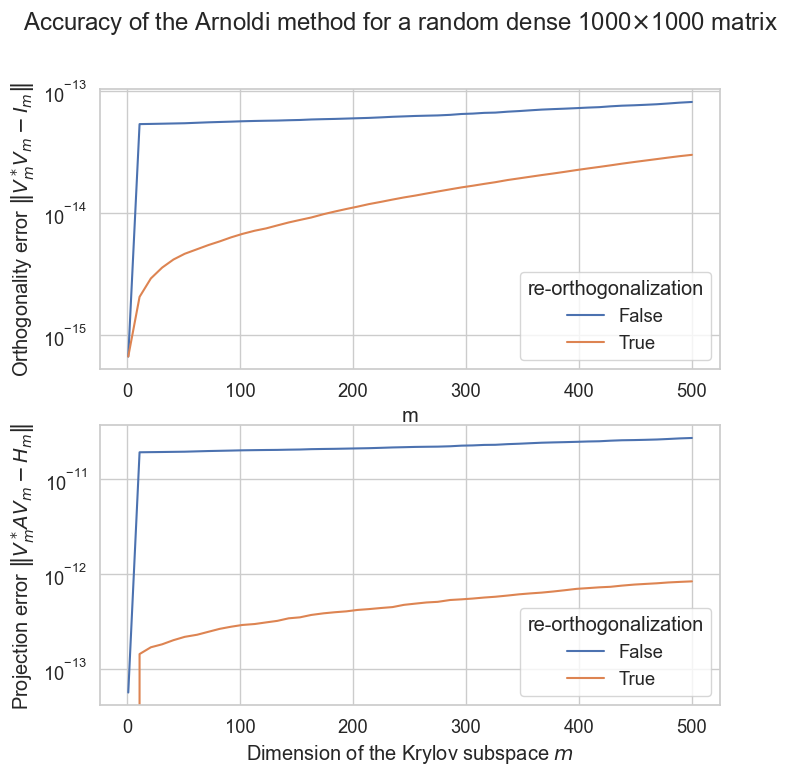

In [6]:
n = 1000
check_arnoldi(
    A=np.random.random_sample(size=(n, n)).astype(np.float64),
    v=np.ones(shape=(n,), dtype=np.float64),
    ms = [int(m) for m in np.linspace(1, 500, 50)],
    title=f'Accuracy of the Arnoldi method for a random dense {n}$\\times${n} matrix',
)

## `fd_1d`

<Figure size 640x480 with 0 Axes>

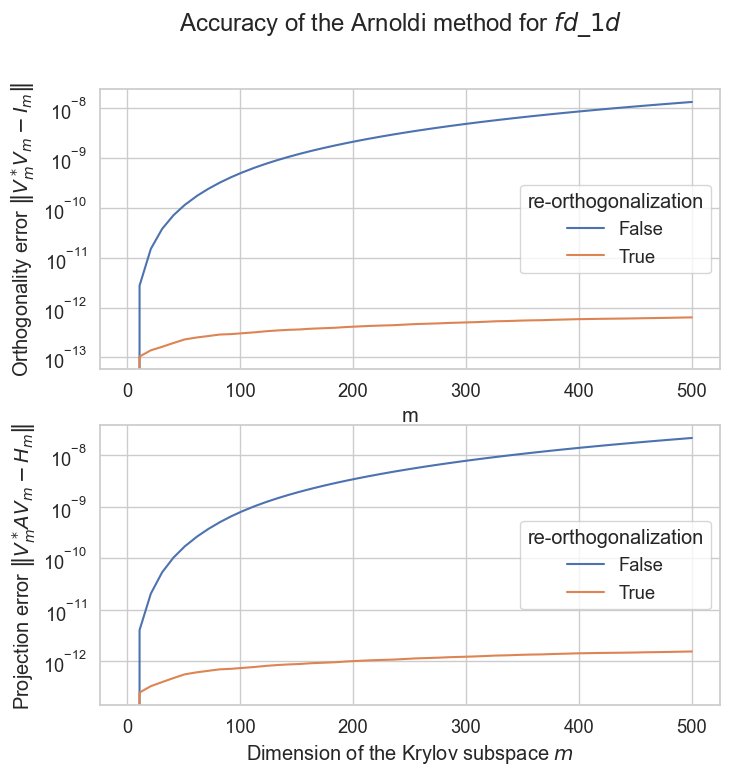

In [7]:
check_arnoldi(
    A=fd_1d,
    v=np.ones(shape=(fd_1d.shape[0],), dtype=fd_1d.dtype),
    ms = [int(m) for m in np.linspace(1, 500, 50)],
    title='Accuracy of the Arnoldi method for $fd\_1d$',
)

## `fd_2d`

<Figure size 640x480 with 0 Axes>

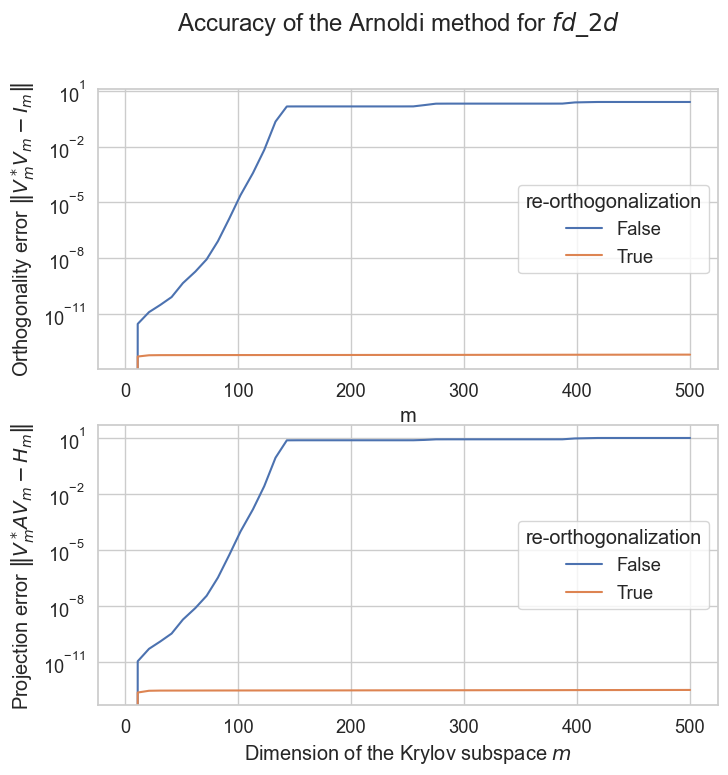

In [8]:
check_arnoldi(
    A=fd_2d,
    v=np.ones(shape=(fd_2d.shape[0],), dtype=fd_2d.dtype),
    ms = [int(m) for m in np.linspace(1, 500, 50)],
    title='Accuracy of the Arnoldi method for $fd\_2d$',
)

## `fd_3d`

<Figure size 640x480 with 0 Axes>

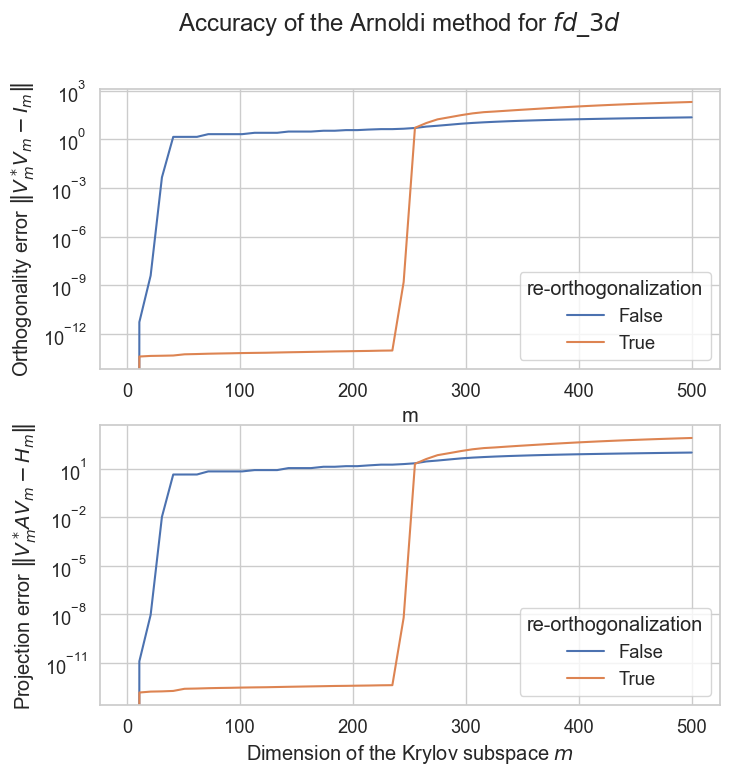

In [9]:
check_arnoldi(
    A=fd_3d,
    v=np.ones(shape=(fd_3d.shape[0],), dtype=fd_3d.dtype),
    ms = [int(m) for m in np.linspace(1, 500, 50)],
    title='Accuracy of the Arnoldi method for $fd\_3d$',
)

## `orani678`

<Figure size 640x480 with 0 Axes>

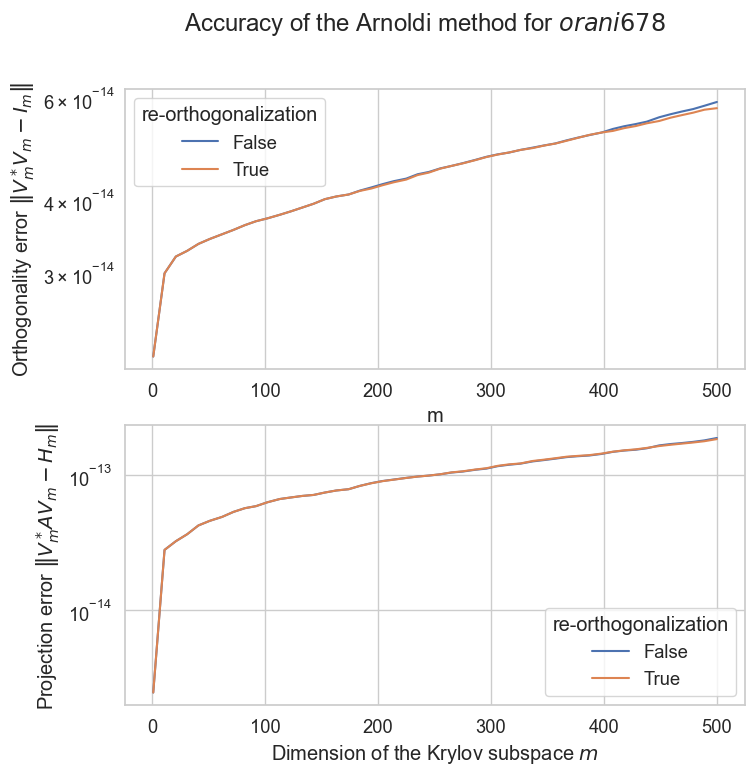

In [10]:
check_arnoldi(
    A=orani678,
    v=np.ones(shape=(orani678.shape[0],), dtype=orani678.dtype),
    ms = [int(m) for m in np.linspace(1, 500, 50)],
    title='Accuracy of the Arnoldi method for $orani678$',
)

## `bcspwr10`

<Figure size 640x480 with 0 Axes>

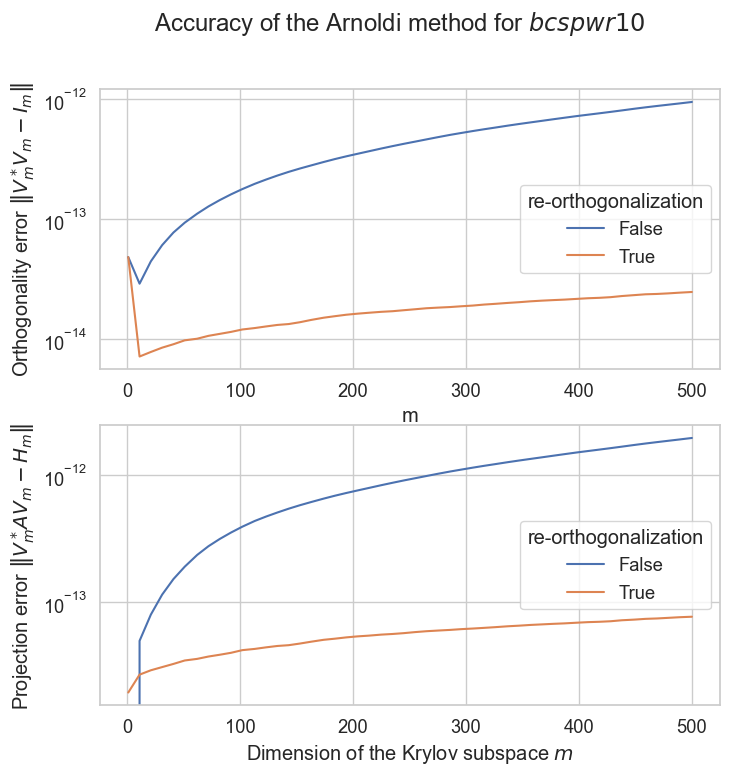

In [11]:
check_arnoldi(
    A=bcspwr10,
    v=np.array([1, 0] * (bcspwr10.shape[0] // 2)),
    ms = [int(m) for m in np.linspace(1, 500, 50)],
    title='Accuracy of the Arnoldi method for $bcspwr10$',
)

## `gr_30_30`

<Figure size 640x480 with 0 Axes>

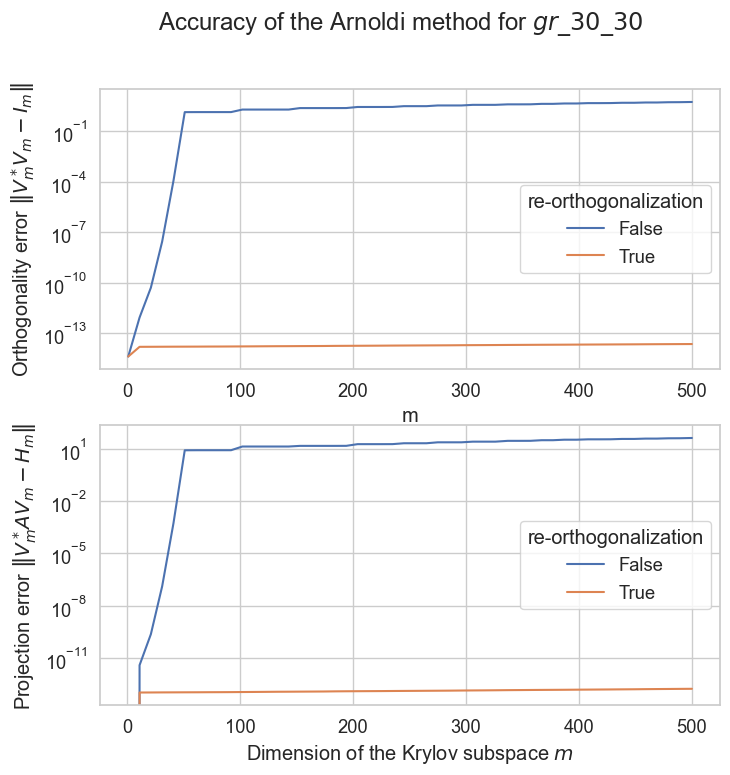

In [12]:
check_arnoldi(
    A=gr_30_30,
    v=np.ones(shape=(gr_30_30.shape[0],), dtype=gr_30_30.dtype),
    ms = [int(m) for m in np.linspace(1, 500, 50)],
    title='Accuracy of the Arnoldi method for $gr\_30\_30$',
)

## `helm2d03`

<Figure size 640x480 with 0 Axes>

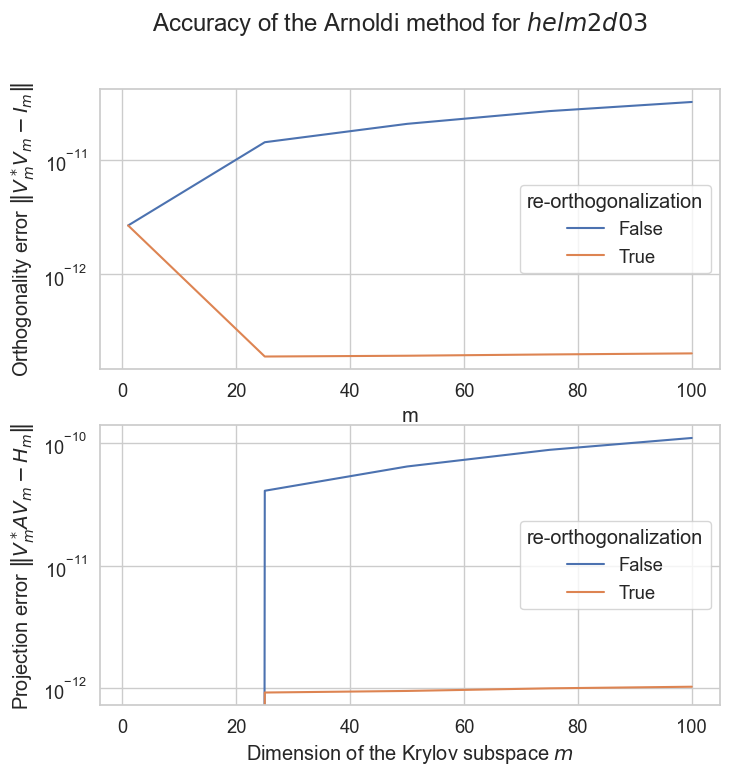

In [13]:
check_arnoldi(
    A=helm2d03,
    v=np.ones(shape=(helm2d03.shape[0],), dtype=helm2d03.dtype),
    ms = [int(m) for m in np.linspace(1, 100, 5)],
    title='Accuracy of the Arnoldi method for $helm2d03$',
)

# $\varphi$-function approximation

In [6]:
def study_convergence(
        A: SparseMatrix, v: np.ndarray,
        p_max: int = 5, ms: list = None,
        title: str = None,
        m_exact: int = None,
) -> None:
    dfs = []
    for p in range(p_max):
        # Create the phi-function
        phi = Phi(p=p)

        # Get the true evaluation
        if not m_exact:
            exact = phi.recursive(A=A, v=v)
        else:
            exact = phi.krylovsubspace(A=A, v=v, m=m_exact)

        # get the Krylov subspace method approximation
        if not ms:
            ms = [int(m) for m in np.linspace(1, 100, 51)]
        errs = []
        for m in ms:
            krylov = phi.krylovsubspace(A=A, v=v, m=m)
            errs.append(relative_error(approximation=krylov, exact=exact))

        dfs.append(
            pd.DataFrame({
                'p': [p] * len(ms),
                'm': ms,
                'errs': errs,
            })
        )

    # Plot the errors
    data = pd.concat(objs=dfs, axis=0)
    sns.relplot(
        data=data,
        x='m',
        y='errs',
        hue='p',
        kind='line',
        height=5,
        aspect=1.5,
    )
    plt.yscale('log')
    if title:
        plt.title(title)
    plt.xlabel('Dimension of the Krylov subspace ($m$)')
    plt.ylabel('Relative error of $\\varphi_p(A)v$')

    return data

## Random sparse matrix

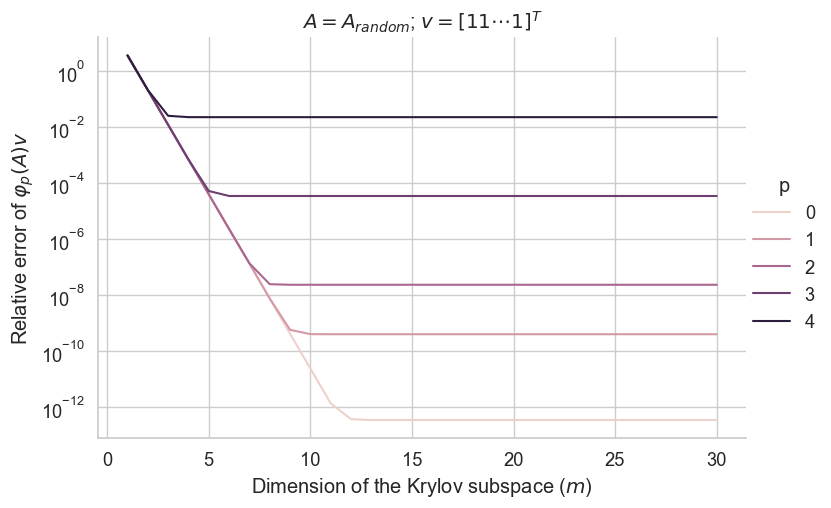

In [8]:
n = 3712
A_random = sps.rand(n, n, dtype=np.float64, format='csc', density=.1)
_ = study_convergence(
    A=A_random,
    v=np.ones(shape=(A_random.shape[0],), dtype=A_random.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{random}$; $v=[1 1 \cdots 1]^T$',
    m_exact=256,
)

## `fd_1d`

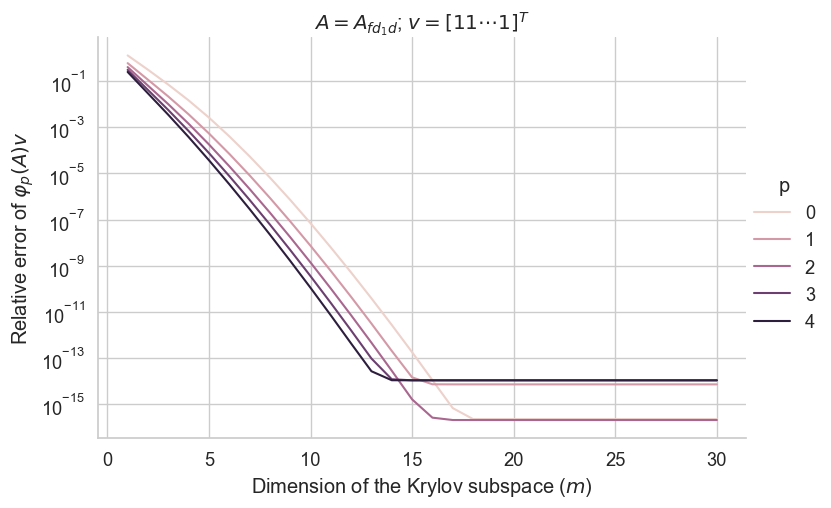

In [16]:
_ = study_convergence(
    A=fd_1d,
    v=np.ones(shape=(fd_1d.shape[0],), dtype=fd_1d.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{fd_1d}$; $v=[1 1 \cdots 1]^T$',
    m_exact=256,
)

## `fd_2d`

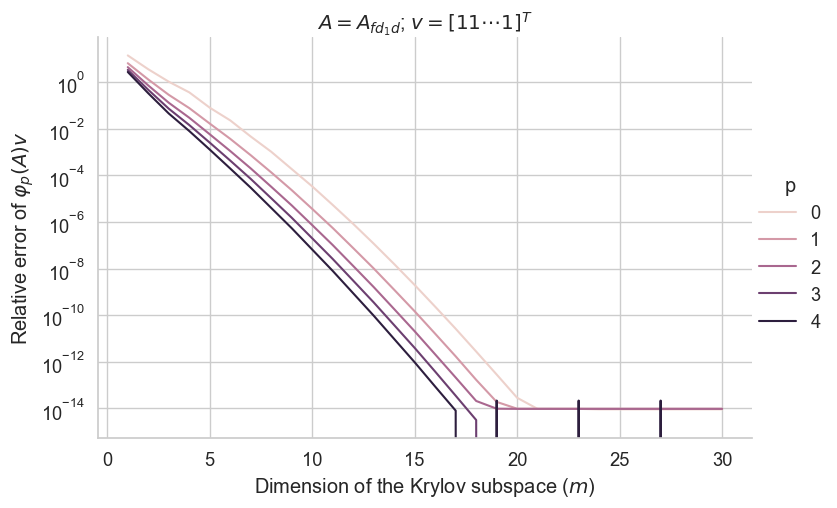

In [17]:
_ = study_convergence(
    A=fd_2d,
    v=np.ones(shape=(fd_2d.shape[0],), dtype=fd_2d.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{fd_1d}$; $v=[1 1 \cdots 1]^T$',
    m_exact=256,
)

## `fd_3d`

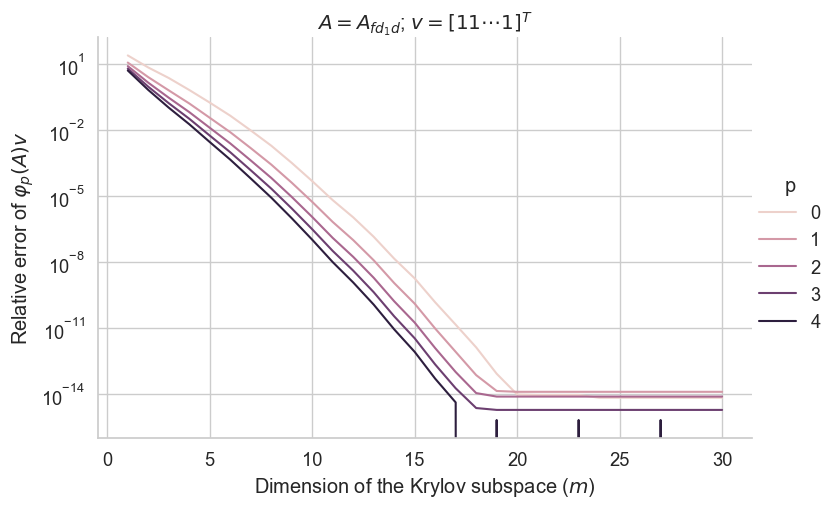

In [18]:
_ = study_convergence(
    A=fd_3d,
    v=np.ones(shape=(fd_3d.shape[0],), dtype=fd_3d.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{fd_1d}$; $v=[1 1 \cdots 1]^T$',
    m_exact=256,
)

## [`orani678`](https://suitesparse-collection-website.herokuapp.com/?filterrific%5Bsearch_query%5D=orani678&filterrific%5Bsorted_by%5D=name_asc) (unsymmetric)

In [19]:
orani678.shape

(2529, 2529)

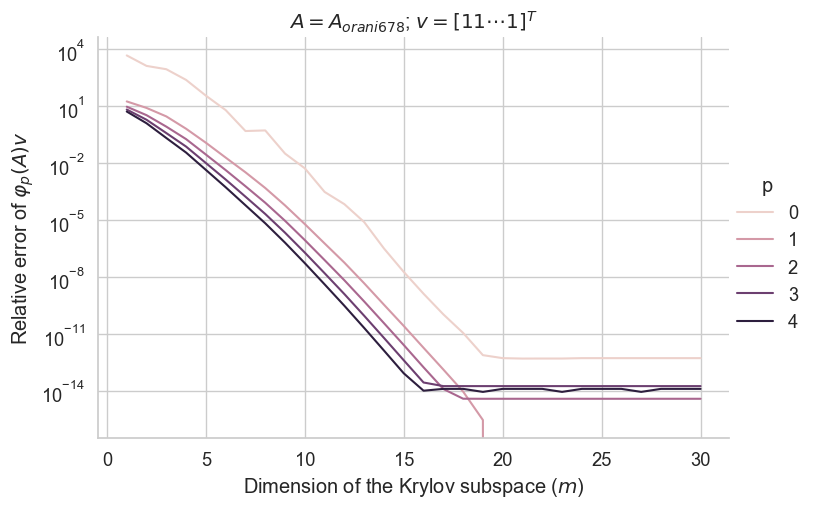

In [20]:
# CHECK: It does not look good when compared to the recurrence metod
data_orani = study_convergence(
    A=orani678,
    v=np.ones(shape=(orani678.shape[0],), dtype=orani678.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{orani678}$; $v=[1 1 \cdots 1]^T$',
    m_exact=256,
)

## [`bcspwr10`](https://suitesparse-collection-website.herokuapp.com/?filterrific%5Bsearch_query%5D=bcspwr10&filterrific%5Bsorted_by%5D=name_asc) (Hermitian, singular)

In [21]:
bcspwr10.shape

(5300, 5300)

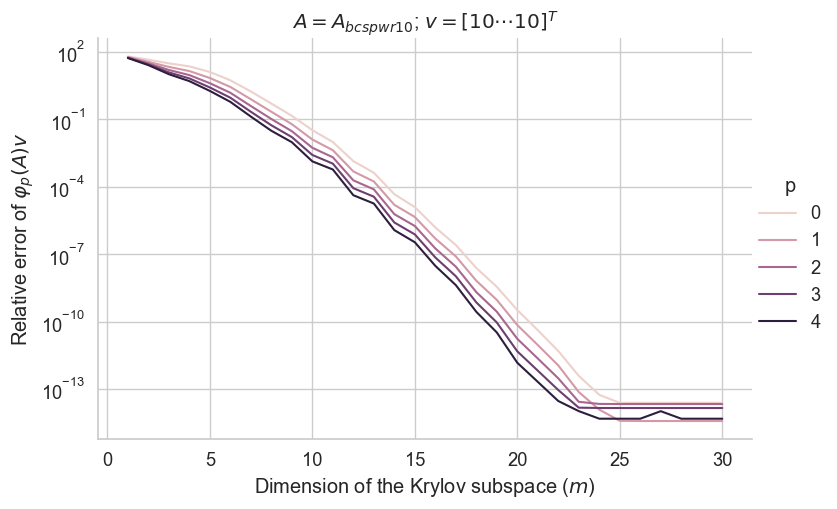

In [22]:
data_bcspwr10 = study_convergence(
    A=bcspwr10,
    v=np.array([1, 0] * (bcspwr10.shape[0] // 2)),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{bcspwr10}$; $v=[1 0 \cdots 1 0]^T$',
    m_exact=256,  # NOTE: Singular matrix, m_exact must be given
)

## [`gr_30_30`](https://suitesparse-collection-website.herokuapp.com/HB/gr_30_30) (symmetric)

In [23]:
gr_30_30.shape

(900, 900)

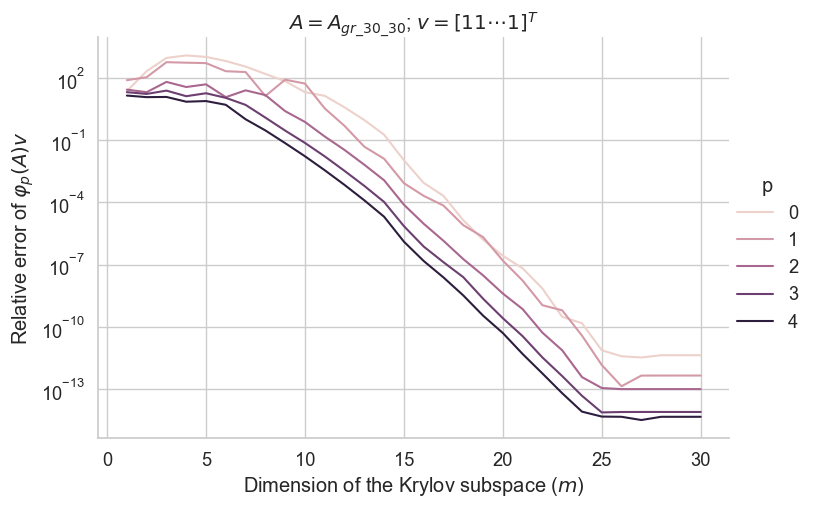

In [24]:
data_gr3030 = study_convergence(
    A=gr_30_30,
    v=np.ones(shape=(gr_30_30.shape[0],), dtype=gr_30_30.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{gr\_30\_30}$; $v=[1 1 \cdots 1]^T$',
    m_exact=256,
)

## [`helm2d03`](https://suitesparse-collection-website.herokuapp.com/GHS_indef/helm2d03) (symmetric)

In [25]:
helm2d03.shape

(392257, 392257)

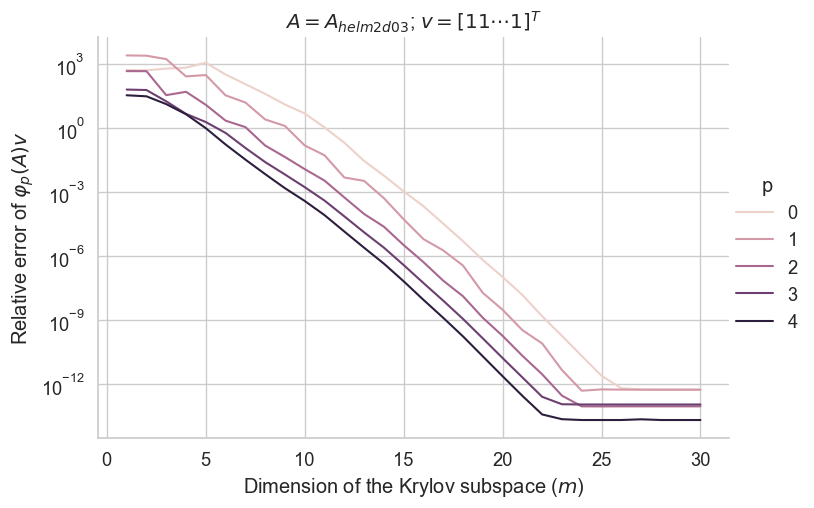

In [26]:
data_helm2d03 = study_convergence(
    A=helm2d03,
    v=np.ones(shape=(helm2d03.shape[0],), dtype=helm2d03.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{helm2d03}$; $v=[1 1 \cdots 1]^T$',
    m_exact=256,
)